In [1]:
from textblob import TextBlob
import codecs
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pandas_datareader import data as web
import datetime
import numpy as np

In [2]:
#STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS
df = pd.read_excel("clean_tweet_data_master.xlsx")
#ata
x=df["cleaned_text"]
for i in x:
    #print(i)
    blob=TextBlob(i)
    print(blob.sentiment)





Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.41666666666666663)
Sentiment(polarity=-0.4, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.2722222222222222)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.31666666666666665, subjectivity=0.5499999999999999)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09848484848484848, subjectivity=0.5833333333333333)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.275, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.

In [3]:
cdata=df[['date','cleaned_text']]
cdata

,date,cleaned_text
0,2020-03-30,liquid shall never freez ice stockmarket close...
1,2020-03-30,nasdaq djia spx spi nasdaq djia stock stockmar...
2,2020-03-30,stockmarket detach econom realiti
3,2020-03-30,stockmarket well
4,2020-03-30,import messag top saudi economist privat secto...
...,...,...
2441,2019-12-31,lundin gold inc top pick stockchas stock finan...
2442,2019-12-31,ramp ecuador lundin gold inc stock financ stoc...
2443,2019-12-31,turquois hill resourc top pick stockchas stock...
2444,2019-12-31,free trial readi green check newest featur bes...


In [4]:
#Creating a dataframe where we will combine the tweets date wise and store int
ccdata=pd.DataFrame(columns=['date','cleaned_text'])


In [5]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.date.iloc[i]
    next_date=cdata.date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.cleaned_text.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'date',get_date)
        ccdata.set_value(indx,'cleaned_text',get_tweet)
        indx=indx+1
        get_tweet=" "

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [6]:
ccdata #All the tweets has been clubbed as per their date

,date,cleaned_text
0,2020-03-30,liquid shall never freez ice stockmarket close...
1,2020-03-29,economist chart given world coronaviru china ...
2,2020-03-28,good exampl prep correctli took book good tra...
3,2020-03-27,week spx comp dow stock stockmarket investor ...
4,2020-03-26,bear bullmarket shortest ever amount time sto...
...,...,...
100,2020-01-05,repost via rightli said learn earn invest inv...
101,2020-01-04,hedg fund industri lag stupend ralli huge mar...
102,2020-01-03,track stockmarket reaction us airstrik kill s...
103,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...


In [7]:
read_stock_p=pd.read_excel('Dow.xlsx')

read_stock_p=read_stock_p[2:][['Attributes','Close']].rename(columns={"Attributes": "Date"}).reset_index(drop=True)
read_stock_p['Date']=read_stock_p['Date'].dt.strftime('%Y-%m-%d')
read_stock_p

,Date,Close
0,2020-01-02,53.75
1,2020-01-03,52.42
2,2020-01-06,52.21
3,2020-01-07,52.19
4,2020-01-08,52.73
...,...,...
57,2020-03-25,30.38
58,2020-03-26,29.68
59,2020-03-27,28.56
60,2020-03-30,28.65


In [8]:
#Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe
ccdata['Prices']=""

In [9]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [10]:
#Prices are fetched but some entires are blank as close price might not be available for that day due to some 
#reason (like holiday, etc.)
ccdata

,date,cleaned_text,Prices
0,2020-03-30,liquid shall never freez ice stockmarket close...,28
1,2020-03-29,economist chart given world coronaviru china ...,
2,2020-03-28,good exampl prep correctli took book good tra...,
3,2020-03-27,week spx comp dow stock stockmarket investor ...,28
4,2020-03-26,bear bullmarket shortest ever amount time sto...,29
...,...,...,...
100,2020-01-05,repost via rightli said learn earn invest inv...,
101,2020-01-04,hedg fund industri lag stupend ralli huge mar...,
102,2020-01-03,track stockmarket reaction us airstrik kill s...,52
103,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53


In [11]:
#Forward fill NaN values in the Prices Column
ccdata['Prices'] = ccdata['Prices'].replace('', np.NaN)
ccdata['Prices'] = ccdata['Prices'].fillna(method='ffill')
ccdata

,date,cleaned_text,Prices
0,2020-03-30,liquid shall never freez ice stockmarket close...,28.0
1,2020-03-29,economist chart given world coronaviru china ...,28.0
2,2020-03-28,good exampl prep correctli took book good tra...,28.0
3,2020-03-27,week spx comp dow stock stockmarket investor ...,28.0
4,2020-03-26,bear bullmarket shortest ever amount time sto...,29.0
...,...,...,...
100,2020-01-05,repost via rightli said learn earn invest inv...,52.0
101,2020-01-04,hedg fund industri lag stupend ralli huge mar...,52.0
102,2020-01-03,track stockmarket reaction us airstrik kill s...,52.0
103,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53.0


In [12]:
#Making "Prices" column as integer so mathematical operations could be performed easily
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [13]:
#Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. 
#Comp is "Compound" it will tell whether the statement is overall negative or positive. 
#If it has negative value then it is negative, if it has positive value then it is positive. 
#If it has value 0, then it is neutral

ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,date,cleaned_text,Prices,Comp,Negative,Neutral,Positive
0,2020-03-30,liquid shall never freez ice stockmarket close...,28,,,,
1,2020-03-29,economist chart given world coronaviru china ...,28,,,,
2,2020-03-28,good exampl prep correctli took book good tra...,28,,,,
3,2020-03-27,week spx comp dow stock stockmarket investor ...,28,,,,
4,2020-03-26,bear bullmarket shortest ever amount time sto...,29,,,,
...,...,...,...,...,...,...,...
100,2020-01-05,repost via rightli said learn earn invest inv...,52,,,,
101,2020-01-04,hedg fund industri lag stupend ralli huge mar...,52,,,,
102,2020-01-03,track stockmarket reaction us airstrik kill s...,52,,,,
103,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53,,,,


In [14]:
import nltk
#nltk.download('vader_lexicon')

In [15]:
#This part of the code is responsible for assigning the polarity for each statement. 
#That is how much positive, negative, neutral you statement is. And also assign the compound value that is 
#overall sentiment of the statement

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'cleaned_text'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)



/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [16]:
ccdata

,date,cleaned_text,Prices,Comp,Negative,Neutral,Positive
0,2020-03-30,liquid shall never freez ice stockmarket close...,28,0.9674,0.071,0.822,0.107
1,2020-03-29,economist chart given world coronaviru china ...,28,0.9833,0.09,0.686,0.224
2,2020-03-28,good exampl prep correctli took book good tra...,28,0.9702,0.048,0.831,0.121
3,2020-03-27,week spx comp dow stock stockmarket investor ...,28,0.5574,0.09,0.81,0.099
4,2020-03-26,bear bullmarket shortest ever amount time sto...,29,0.9538,0.079,0.818,0.104
...,...,...,...,...,...,...,...
100,2020-01-05,repost via rightli said learn earn invest inv...,52,0.6369,0,0.861,0.139
101,2020-01-04,hedg fund industri lag stupend ralli huge mar...,52,0.7433,0.09,0.796,0.114
102,2020-01-03,track stockmarket reaction us airstrik kill s...,52,0.7626,0.072,0.809,0.119
103,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53,0.9231,0.054,0.804,0.143


% of positive tweets=  76.19047619047619
% of negative tweets=  18.095238095238095


[]

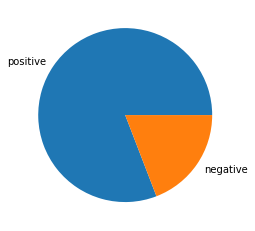

In [17]:
#Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same
import matplotlib.pyplot as plt
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()


In [18]:
df_=ccdata[['date','Prices','Comp','Negative','Neutral','Positive']].copy()
df_

,date,Prices,Comp,Negative,Neutral,Positive
0,2020-03-30,28,0.9674,0.071,0.822,0.107
1,2020-03-29,28,0.9833,0.09,0.686,0.224
2,2020-03-28,28,0.9702,0.048,0.831,0.121
3,2020-03-27,28,0.5574,0.09,0.81,0.099
4,2020-03-26,29,0.9538,0.079,0.818,0.104
...,...,...,...,...,...,...
100,2020-01-05,52,0.6369,0,0.861,0.139
101,2020-01-04,52,0.7433,0.09,0.796,0.114
102,2020-01-03,52,0.7626,0.072,0.809,0.119
103,2020-01-02,53,0.9231,0.054,0.804,0.143


In [19]:
#split data
train_start_index = '0'
train_end_index = '50'
test_start_index = '51'
test_end_index = '75'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [20]:
#Making a 2D array that will store the Negative and Positive sentiment for Training dataset
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [21]:
print(numpy_df_train)

[[0.071 0.107]
 [0.09  0.224]
 [0.048 0.121]
 [0.09  0.099]
 [0.079 0.104]
 [0.04  0.109]
 [0.086 0.116]
 [0.103 0.141]
 [0.116 0.148]
 [0.085 0.093]
 [0.13  0.098]
 [0.121 0.118]
 [0.158 0.121]
 [0.122 0.12 ]
 [0.142 0.094]
 [0.093 0.195]
 [0.13  0.116]
 [0.133 0.106]
 [0.191 0.091]
 [0.08  0.135]
 [0.124 0.117]
 [0.16  0.1  ]
 [0.065 0.121]
 [0.    0.   ]
 [0.105 0.122]
 [0.117 0.131]
 [0.134 0.156]
 [0.094 0.079]
 [0.111 0.127]
 [0.174 0.059]
 [0.147 0.073]
 [0.173 0.124]
 [0.136 0.118]
 [0.138 0.119]
 [0.123 0.111]
 [0.118 0.136]
 [0.03  0.096]
 [0.012 0.165]
 [0.021 0.124]
 [0.092 0.135]
 [0.014 0.122]
 [0.075 0.073]
 [0.032 0.09 ]
 [0.027 0.15 ]
 [0.    0.   ]
 [0.041 0.164]
 [0.    0.182]
 [0.    0.031]
 [0.    0.079]
 [0.062 0.135]
 [0.022 0.186]]


In [22]:
#Making a 2D array that will store the Negative and Positive sentiment for Testing dataset
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [23]:
print(numpy_df_test)

[[0.066 0.152]
 [0.    0.127]
 [0.089 0.134]
 [0.031 0.089]
 [0.047 0.087]
 [0.037 0.14 ]
 [0.068 0.154]
 [0.067 0.126]
 [0.059 0.104]
 [0.047 0.095]
 [0.061 0.17 ]
 [0.04  0.081]
 [0.125 0.077]
 [0.027 0.132]
 [0.062 0.155]
 [0.042 0.068]
 [0.049 0.119]
 [0.026 0.132]
 [0.    0.   ]
 [0.    0.   ]
 [0.044 0.095]
 [0.021 0.036]
 [0.073 0.135]
 [0.082 0.155]
 [0.047 0.077]]


In [24]:
#Making 2 dataframe for Training and Testing "Prices"
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

    Prices
0       28
1       28
2       28
3       28
4       29
5       30
6       28
7       26
8       26
9       26
10      27
11      28
12      26
13      26
14      22
15      22
16      22
17      25
18      23
19      27
20      31
21      30
22      30
23      30
24      38
25      40
26      41
27      40
28      41
29      41
30      41
31      40
32      39
33      43
34      43
35      46
36      46
37      46
38      48
39      48
40      47
41      47
42      47
43      47
44      47
45      47
46      47
47      47
48      48
49      48
50      49


In [25]:
#Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value )
!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [26]:
#Making Predictions
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [27]:
print(prediction)

[[36.8       ]
 [47.5       ]
 [37.7       ]
 [42.2       ]
 [31.7       ]
 [41.6       ]
 [32.4       ]
 [33.3       ]
 [32.9       ]
 [31.9       ]
 [38.8       ]
 [42.        ]
 [38.2       ]
 [47.1       ]
 [38.8       ]
 [42.        ]
 [37.8       ]
 [47.1       ]
 [40.76666667]
 [40.76666667]
 [34.        ]
 [44.36666667]
 [33.2       ]
 [28.2       ]
 [39.9       ]]


In [28]:
#Defining index position for the test data. Making dataframe for the predicted value
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [29]:
predictions_df_

,Prices
51,36.800000
52,47.500000
53,37.700000
54,42.200000
55,31.700000
56,41.600000
57,32.400000
58,33.300000
59,32.900000
60,31.900000


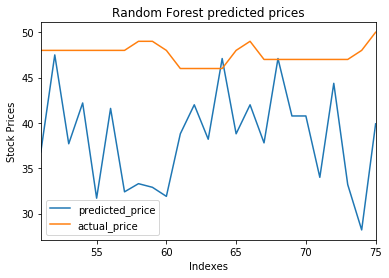

In [30]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
#fig.savefig("random forest.png")

In [31]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
reg.predict(numpy_df_test)

array([[38.00277766],
       [43.58788646],
       [36.07999543],
       [41.00841983],
       [39.66155853],
       [40.45773535],
       [37.83243689],
       [37.94140457],
       [38.635107  ],
       [39.65450748],
       [38.40835782],
       [40.25686985],
       [33.09583003],
       [41.30767645],
       [38.33728953],
       [40.0997498 ],
       [39.46477632],
       [41.39196545],
       [43.6998219 ],
       [43.6998219 ],
       [39.90737449],
       [41.89802309],
       [37.42773812],
       [36.65150945],
       [39.67037234]])

In [33]:
# Performance metrics
errors = abs(prediction - y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: Prices    9.26
dtype: float64 degrees.


In [34]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
mape

Prices    19.347287
dtype: float64

In [35]:
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: Prices    80.65
dtype: float64 %.
